In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib as mpl
from analysis_tools.display import Display

### <center> Customizing Matplotlib: Configurations and Stylesheets

> #### Plot Customization by Hand

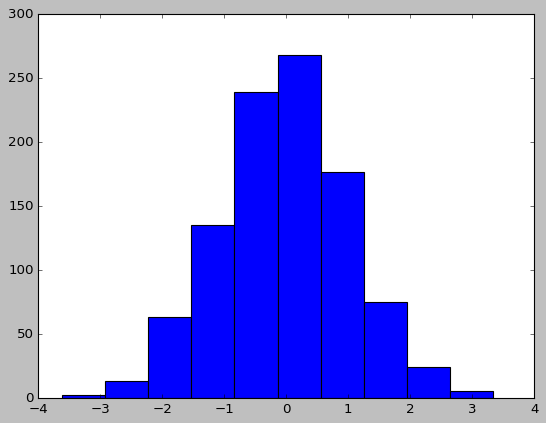

In [2]:
plt.style.use('classic')
x = np.random.randn(1000)
plt.hist(x);

We can adjust this plot by hand to make it more visually pleasing.

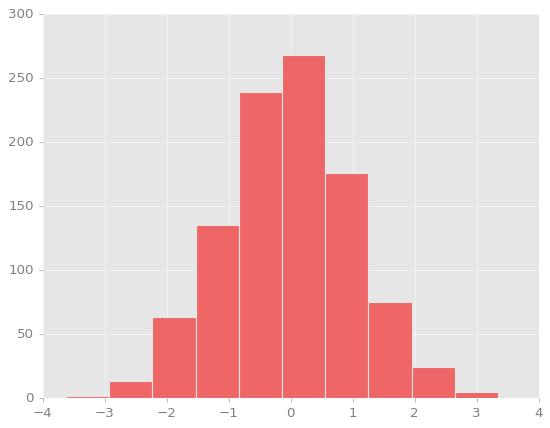

In [3]:
# use a gray background
fig = plt.figure(facecolor='white')
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white gridlines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

#control face and edge colour of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');



This looks better, and you may recognize the look as inspired by that of the R language’s ggplot visualization package. But this took a whole lot of effort! Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

> #### Changing the Defaults: rcParams

In [4]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
# figure and axes
plt.rc('figure', facecolor='white')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', 
       axisbelow=True, grid=True, prop_cycle=colors)
# grid
plt.rc('grid', color='white', linestyle='solid')

# ticks
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')

plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

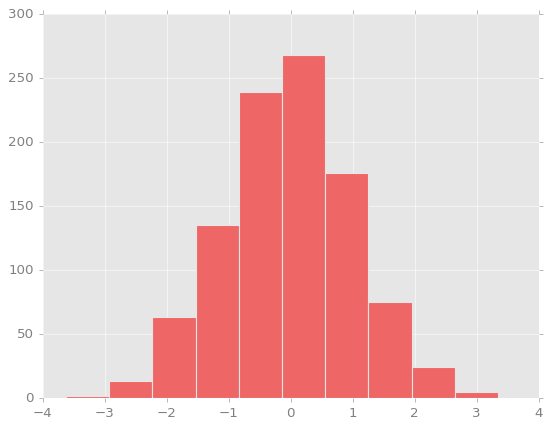

In [5]:
plt.hist(x);

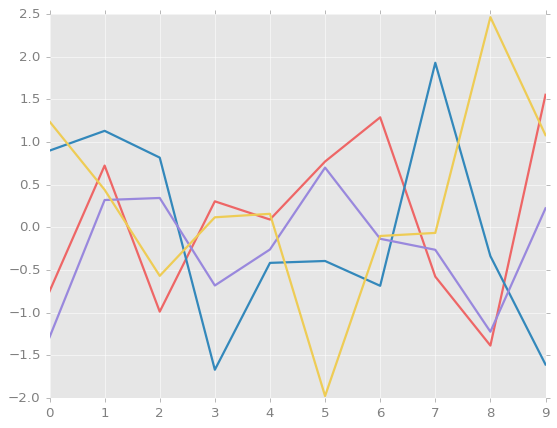

In [6]:
for i in range(4):
    plt.plot(np.random.randn(10))

Your preferred settings can be saved in a .matplotlibrc file. 
For more info consult the [Matplotlib documentation](https://oreil.ly/UwM2u)

> #### Stylesheets
These stylesheets are formatted similarly to the .matplotlibrc
files mentioned earlier, but must be named with a .mplstyle extension.

In [7]:
# the first 5 stylesheets
plt.style.available[:5]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh']

To switch to a stylesheet is to call `style.use` _(This sets the style throughout the notebook session)_:
```python
plt.style.use('stylename')
```

To switch to a stylesheet temporarily (within a context):
```python
with plt.style.context('stylename'):
make_a_plot()
```


In [8]:
 # A function to demonstrate these styles
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

#### Default Style

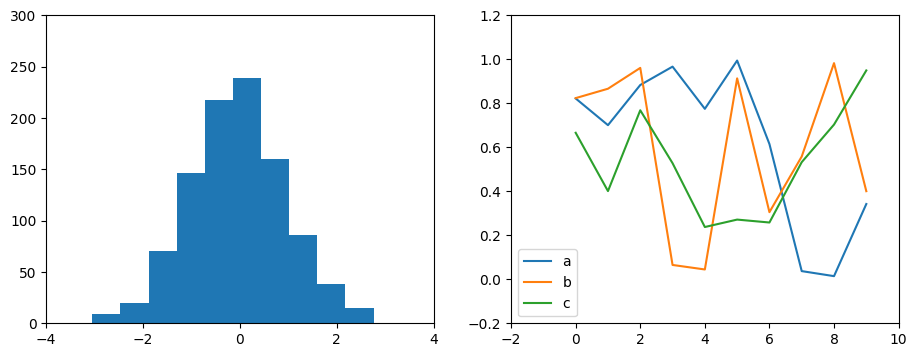

In [9]:
with plt.style.context('default'):
    hist_and_lines()

#### FiveThirtyEight Style

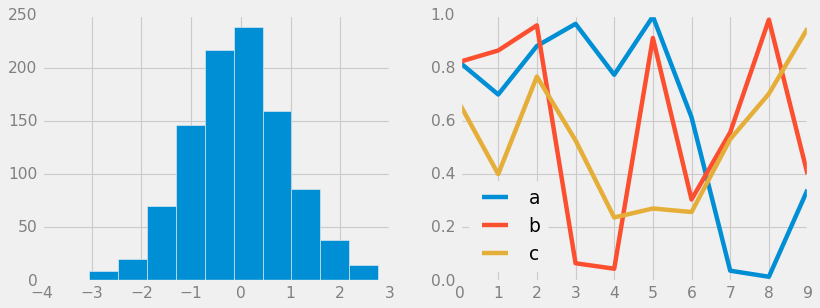

In [10]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

#### ggplot Style `R`

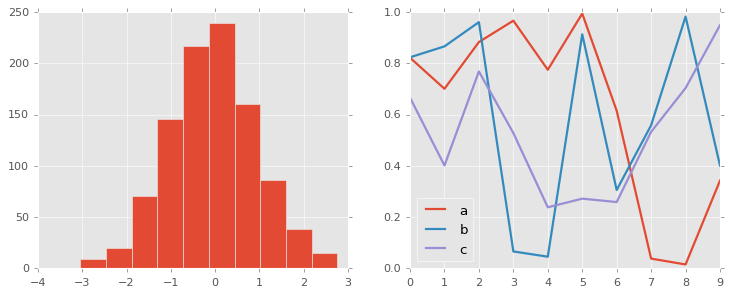

In [11]:
with plt.style.context('ggplot'):
    hist_and_lines()

#### Bayesian Methods for Hackers Style `bmh`

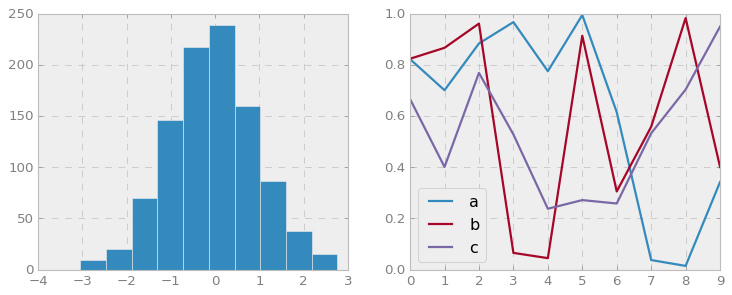

In [12]:
with plt.style.context('bmh'):
    hist_and_lines()

#### Dark Background Style

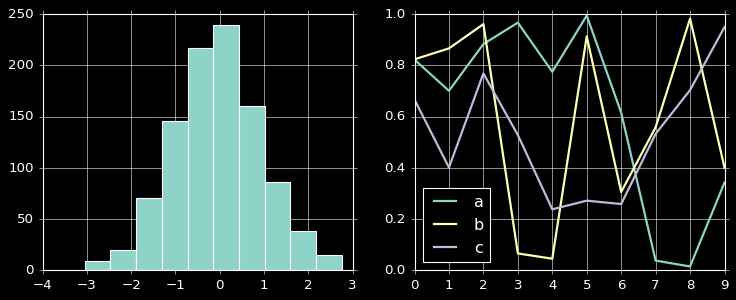

In [13]:
with plt.style.context('dark_background'):
    hist_and_lines()

#### Grayscale Style

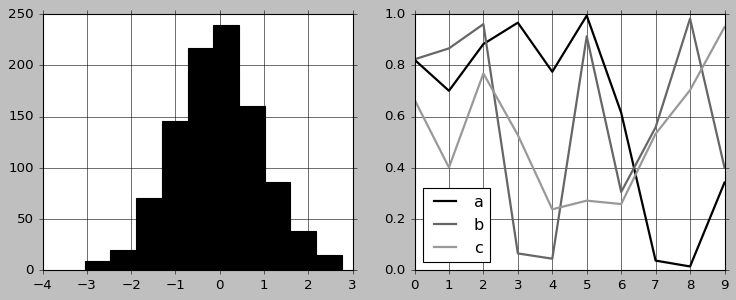

In [14]:
with plt.style.context('grayscale'):
    hist_and_lines()

#### Seaborn Style

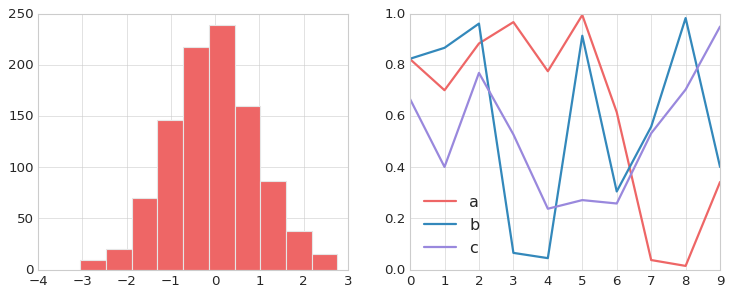

In [15]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    hist_and_lines()

<br>

## <center> Three-Dimensional Plotting in Matplotlib

In [16]:
from mpl_toolkits import mplot3d

In [17]:
# to use `%matplotlib widget`
# !pip install ipympl

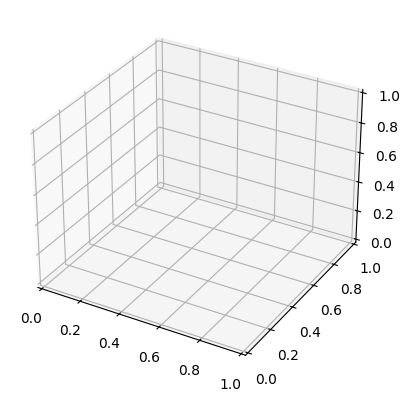

In [18]:
plt.style.use('default')
fig = plt.figure()
ax = plt.axes(projection='3d')

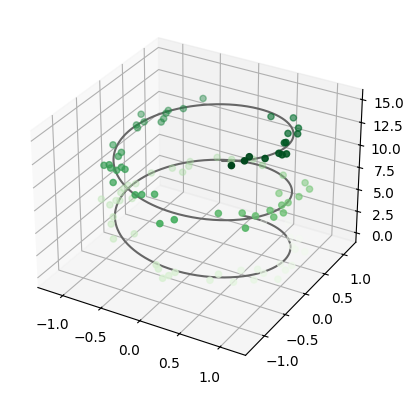

In [19]:
# Data for 3d line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, '0.4')

# Data for 3d points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
fig

> ### 3D Contour Plots

In [20]:
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
z = f(x, y)
X,Y = np.meshgrid(x, y)
Z = f(X, Y)

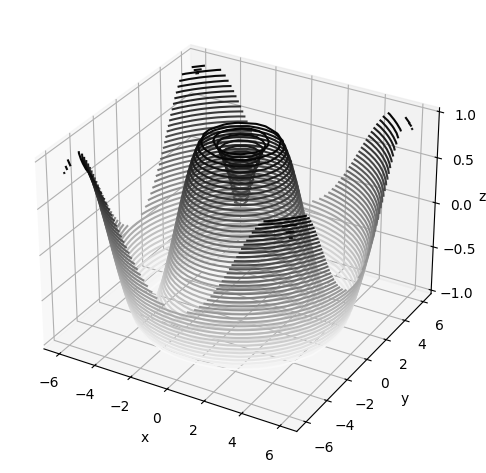

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 40, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z', labelpad=0)

plt.tight_layout()
ax.zaxis.set_major_locator(plt.MultipleLocator(0.5))

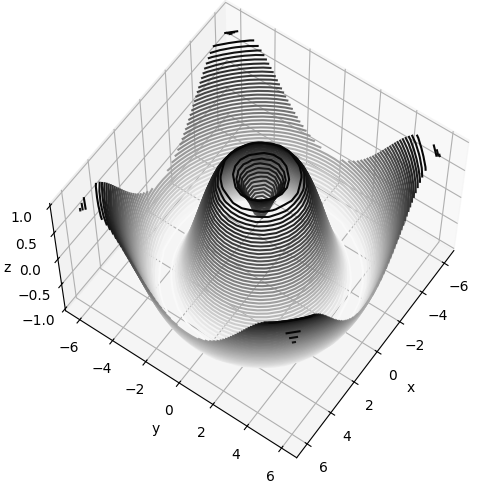

In [22]:
ax.view_init(60, 35)
fig

> ### Wireframes and Surface Plots 

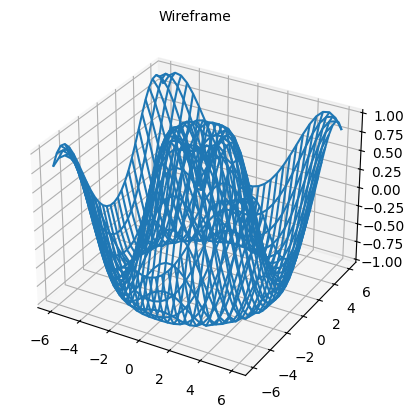

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.set_title('Wireframe', size=10);

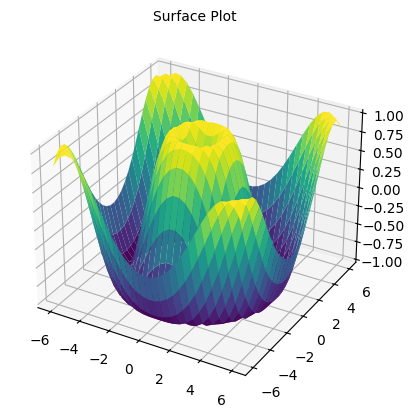

In [24]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Surface Plot', size=10);

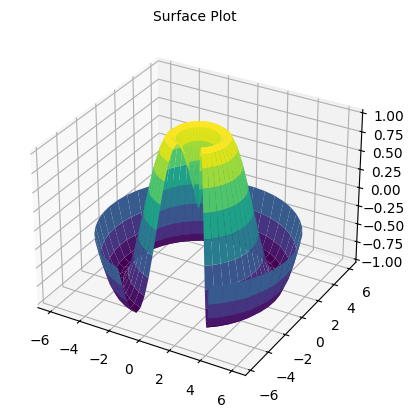

In [25]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Surface Plot', size=10);

> ### Surface Triangulations

In [26]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

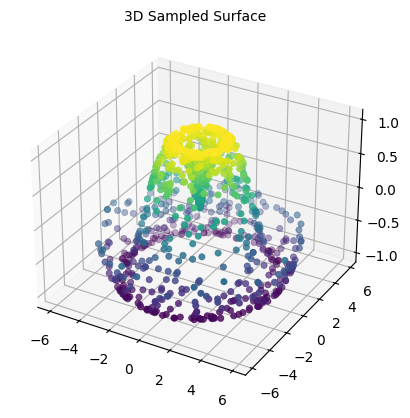

In [27]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)
ax.set_title('3D Sampled Surface', size=10);

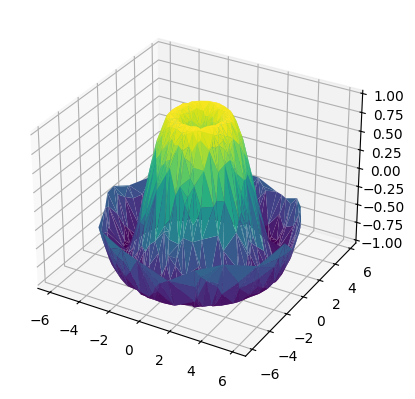

In [28]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

### Visualizing a Mobius Strip

In [54]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

# For a Möbius strip, we must have the strip make half a twist during a full loopΔφ = Δθ/2:
phi = 0.5 * theta

# radius in the x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

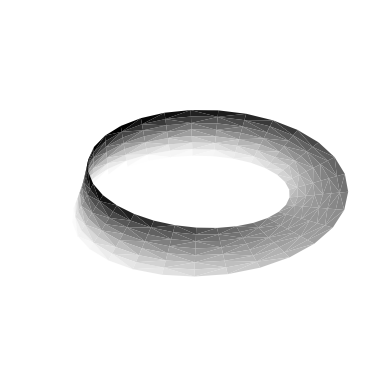

In [65]:
# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='Greys', linewidths=0.2, edgecolor='None')
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);
ax.axis('off');